In [1]:
import sys
import glob
import os
import itertools as it

import numpy as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

import invisible_cities.database.load_db       as DB
import invisible_cities.io      .pmaps_io      as pmapio
import invisible_cities.core    .fit_functions as fitf
import invisible_cities.reco    .dst_functions as dstf

from invisible_cities.icaro.hst_functions import *
from icaro.core.fit_functions import *

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 12, 8
plt.rcParams[  "font.size"   ] = 15

In [33]:
run_number = 5781
path       = f"/Users/Gonzalo/github/NEXTdata/RunIV/{run_number}/"
filenames  = glob.glob(path + "*.h5")
datapmt    = DB.DataPMT (run_number)
datasipm   = DB.DataSiPM(run_number)

In [35]:
pmaps_dict = {}
for i, filename in enumerate(filenames[122:123]):
    if not i % 100: print(i)
    try:
        pmaps_dict.update(pmapio.load_pmaps(filename))
    except Exception as e:
        print(i, str(e))

pmaps = list(pmaps_dict.values())

0


In [36]:
def plot_pmap(pmap):
    main_frame = plt.gcf().add_axes((.1, .5,
                                     .9, .4))
    for s1 in pmap.s1s:
        plt.plot(s1.times / 1e3, s1.pmts.sum_over_sensors, label="sum")
    for s2 in pmap.s2s:
        plt.plot(s2.times / 1e3, s2.pmts.sum_over_sensors)

    s1_frame = plt.gcf().add_axes((.1, .1,
                                   .4, .3))
    if pmap.s1s:
        s1 = sorted(pmap.s1s, key=lambda s: s.total_energy)[-1]
        plt.plot(s1.times / 1e3, s1.pmts.sum_over_sensors)

    s2_frame = plt.gcf().add_axes((.6, .1,
                                   .4, .3))
    if pmap.s2s:
        s2 = sorted(pmap.s2s, key=lambda s: s.total_energy)[-1]
        plt.plot(s2.times / 1e3, s2.pmts.sum_over_sensors)

In [42]:
pmaps_dict

{20009: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 1, 20010: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 20011: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 20012: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 20013: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 1, 20014: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 20015: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 20016: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 1
 Number of S2s: 2, 20017: 
 ---------------------
 PMap instance
 ---------------------
 Number of S1s: 0
 Number of S2s: 1, 20018: 
 ---------------------
 PMap instance

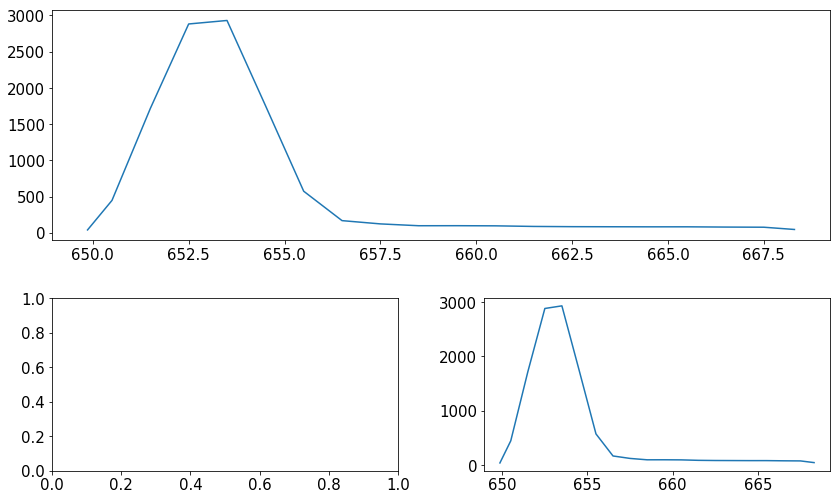

In [45]:
plot_pmap(pmaps_dict[20011])

In [46]:
pmaps_dict[20011].s2s[0]


      ---------------------
      S2 instance
      ---------------------
      Number of samples: 20
      Times: [ 649.86248779  650.5         651.5         652.5         653.5         654.5
655.5         656.5         657.5         658.5         659.5         660.5
661.5         662.5         663.5         664.5         665.5         666.5
667.5         668.29998779] µs
      Time @ max energy: 653.5
      Width: 18.4375 µs
      Height: 2930.875732421875 pes
      Energy: 11549.0947265625 pes
      Charge: 741.1482543945312 pes
      RMS: 3.103903564453125 µs

In [49]:
pmaps_dict[20011].s2s[0].pmts


------------------------
PMTResponses instance
------------------------
Number of sensors: 11
          | ID: 0
          | WF: [   2.59340692   38.1760788   174.80195618  280.58831787  280.44448853
169.9596405    40.41400909   16.18001556   10.1447897     8.83535576
  9.822052      9.04985142    8.13687229    7.66928053    8.24647427
  8.2958765     7.54626989    7.86943769    7.84325552    4.33272171]

          | ID: 1
          | WF: [   5.62373781   51.58310699  191.69047546  298.40203857  294.1892395
189.57507324   83.87403107   15.68330765   10.05646801    9.53038788
  9.5486002     9.08764553    8.84824467    9.02245808    8.49471092
  8.43591404    8.29008865    8.15881157    8.14429855    4.79487514]

          | ID: 2
          | WF: [   3.95335913   45.09678268  150.953125    273.67745972  281.20462036
160.62458801   47.24937057   12.02297878   10.25172329    8.1773262
  7.83177662    7.66608715    6.96287823    7.57786083    7.24822807
  6.92041779    7.1081295     6.7388